In [1]:
import numpy as np
from pbcpy.grid import Grid, Grid_Function
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
at = np.identity(3)
at[0][0]=2
print(at)

[[ 2.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [44]:
nr = [501,1,1]
grid = Grid(at, nr)

In [45]:
dens = Grid_Function(grid=grid)

In [64]:
alpha=0.6

In [65]:
def r_square(grid,center):
    return np.einsum('ijkl,ijkl->ijk',grid.r-center,grid.r-center)

In [66]:
dens.values = (1.0/(alpha*np.sqrt(2.0*np.pi)))*np.exp(-r_square(grid,[1,0.5,0.5])/(2.0*alpha**2))
print(dens.values)

[[[ 0.08279015]]

 [[ 0.08371146]]

 [[ 0.08463927]]

 [[ 0.08557358]]

 [[ 0.08651438]]

 [[ 0.08746165]]

 [[ 0.08841537]]

 [[ 0.08937554]]

 [[ 0.09034213]]

 [[ 0.09131514]]

 [[ 0.09229454]]

 [[ 0.09328032]]

 [[ 0.09427245]]

 [[ 0.09527092]]

 [[ 0.0962757 ]]

 [[ 0.09728677]]

 [[ 0.0983041 ]]

 [[ 0.09932768]]

 [[ 0.10035747]]

 [[ 0.10139345]]

 [[ 0.1024356 ]]

 [[ 0.10348387]]

 [[ 0.10453824]]

 [[ 0.10559868]]

 [[ 0.10666515]]

 [[ 0.10773762]]

 [[ 0.10881607]]

 [[ 0.10990044]]

 [[ 0.1109907 ]]

 [[ 0.11208682]]

 [[ 0.11318875]]

 [[ 0.11429646]]

 [[ 0.11540989]]

 [[ 0.11652902]]

 [[ 0.11765379]]

 [[ 0.11878416]]

 [[ 0.11992008]]

 [[ 0.1210615 ]]

 [[ 0.12220838]]

 [[ 0.12336066]]

 [[ 0.12451829]]

 [[ 0.12568122]]

 [[ 0.1268494 ]]

 [[ 0.12802277]]

 [[ 0.12920127]]

 [[ 0.13038485]]

 [[ 0.13157345]]

 [[ 0.13276701]]

 [[ 0.13396546]]

 [[ 0.13516875]]

 [[ 0.13637681]]

 [[ 0.13758957]]

 [[ 0.13880698]]

 [[ 0.14002895]]

 [[ 0.14125544]]

 [[ 0.1424

In [67]:
densFFT = dens.fft()
print(densFFT)

[[[  1.13131507e+02 +0.00000000e+00j]]

 [[ -2.84865378e+01 +2.10950403e-14j]]

 [[ -2.72641394e+00 -7.29820393e-16j]]

 [[ -1.29751549e+00 +5.15859507e-16j]]

 [[ -7.31267609e-01 -1.20534307e-16j]]

 [[ -4.67942174e-01 -4.04190494e-16j]]

 [[ -3.24882138e-01 +8.87563014e-16j]]

 [[ -2.38657048e-01 -4.00382019e-16j]]

 [[ -1.82716659e-01 -2.96906395e-16j]]

 [[ -1.44376906e-01 +1.99533849e-16j]]

 [[ -1.16959843e-01 -3.04486856e-16j]]

 [[ -9.66784272e-02 -7.64910575e-16j]]

 [[ -8.12552031e-02 +9.24130919e-16j]]

 [[ -6.92538299e-02 -7.01370465e-16j]]

 [[ -5.97320826e-02 -4.98782373e-16j]]

 [[ -5.20510665e-02 +1.24346699e-15j]]

 [[ -4.57651549e-02 -6.49320024e-16j]]

 [[ -4.05558498e-02 -9.24521377e-16j]]

 [[ -3.61906188e-02 +1.08229094e-15j]]

 [[ -3.24964826e-02 -3.27492727e-16j]]

 [[ -2.93426074e-02 -1.12316570e-16j]]

 [[ -2.66285567e-02 +5.65307517e-16j]]

 [[ -2.42761942e-02 -1.99579376e-16j]]

 [[ -2.22239952e-02 -8.37567759e-16j]]

 [[ -2.04229822e-02 -1.33726420e-16j]]



In [68]:
FdensG = densFFT*grid.dV

In [69]:
Fdens = Grid_Function(grid=grid)

In [70]:
print(1/grid.dV)
print(grid.dV)
print(grid.g_dV)
print(grid.g_dV/grid.omega)

250.5
0.00399201596806
0.000998003992016
0.000499001996008


In [71]:
Fdens.reciprocal_values = FdensG

In [72]:
test_func = np.exp(-2*((np.pi*grid.gg*alpha)**2))

In [73]:
#print(test_func)

In [74]:
indx = np.where(grid.gg**2 > 0)

In [75]:
vh=np.zeros(grid.gg.shape,dtype=complex)
vh[indx] = FdensG[indx] * 4.0 * np.pi / grid.gg[indx]**2

In [76]:
vh_plot = Grid_Function(grid=grid)

In [77]:
vh_plot.reciprocal_values=vh

In [78]:
vh_real = vh_plot.ifft()*grid.dV

In [79]:
vh_test = np.zeros(vh_real.shape,dtype=float)

In [80]:
vh_test = (1/np.sqrt(r_square(grid,[2.5,2.5,2.5])))+np.min(np.real(vh_real))

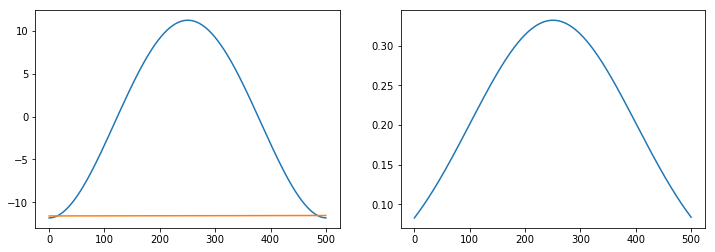

In [81]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(np.real(vh_real[:,0,0]))
ax1.plot(vh_test[:,0,0])
ax2.plot(dens.values[:,0,0])
plt.show()